<img src="images/banner_introRProg.png" align="left" />

<table style="float:right;">
    <tr>
        <td>                      
            <div style="text-align: right"><a href="https://www.research.manchester.ac.uk/portal/syed.murtuzabaker.html" target="_blank">Syed Murtuza Baker</a></div>
            <div style="text-align: right">Research Fellow</div>
            <div style="text-align: right">University of Manchester</div>
         </td>
         <td>
             <img src="images/Syed_Baker.jpg" width="50%" />
         </td>
     </tr>
</table>

# Introduction to ggplot2
****

#### About this Notebook

This notebook would introduce `ggplot2`, one of the most widely used data visualization package.

Level: <code>beginner</code> 

Duration: Approximately 2 hours to complete

<div class="alert alert-block alert-warning"><b>Learning Objectives:</b> 
<br/> At the end of this notebook you will be able to:
    
- Describe the features of the ggplot2 package
    
- Plot in R 
    
- Explain which plots require statistical transformations


</div> 

<a id="top"></a>

<b>Table of contents</b><br>

1.0 [Introduction](#intro)

2.0 [About ggplot2](#ggplot2)

3.0 [Your Turn](#yourturn)

*****

<a id="intro"></a>

## Introduction

R is one of the leading programming languages in Biological data analysis. It is used to perform data analyis, statistics, machine learning and visualisations. This course is designed as an introduction to R for participants with no previous programming experience. 


`ggplot2` is a powerful and a flexible R package, implemented by Hadley Wickham, for producing elegant graphics piece by piece (Wickham et al. 2017).


For help in using this Jupyter notebook please refer to the [Jupyter Notebook User Guide](https://online.manchester.ac.uk/bbcswebdav/orgs/I3116-ADHOC-I3HS-HUB-1/Jupyter%20Notebooks/content/index.html#/)






*****
[back to the top](#top)

<a id="ggplot2"></a>

## Basics of `ggplot2`


The `gg` in `ggplot2` means Grammar of Graphics, a graphic concept which describes plots by using a “grammar”. According to the ggplot2 concept, a plot can be divided into different fundamental parts:

`ggplot2` is

>Plot = Data + Aesthetics + Geometry

* Data: a data frame
- Aesthetics: used to indicate the x and y variables. It can be also used to control the color, the size and the shape of points, etc…..
- Geometry: corresponds to the type of graphics (scatter plot, histogram, box plot, line plot, ….). Additional layers for customization can be done with — `title`, `labels`, `axis`, etc.

### First Plotting

The main function in the ggplot2 package is `ggplot()`, which can be used to initialize the plotting system with data and `x/y` variables.

`ggplot()` creates a coordinate system to which you can add layers to. The first argument of `ggplot()` is the dataset to use in the graph. So `ggplot(data = d_exp` creates an empty graph.

For example, the following R code takes the _KLF4_ and _RUNX1_ data set to initialize the ggplot and then a layer (`geom_point()`) is added onto the ggplot to create a scatter plot of `x = KLF4` by `y = RUNX`1:

```
Data= d_exp
Aesthetic=: aes(x=KLF4, y=RUNX1)
Geometry= geom_point()
```

### Load the libraries

In [2]:
library(tidyverse)
library(dplyr)
library(scater)

In [3]:
sce <- readRDS('/mnt/sce.rds')
sce

class: SingleCellExperiment 
dim: 12695 6826 
metadata(0):
assays(3): counts logcounts norm_exprs
rownames(12695): FO538757.2 AP006222.2 ... AC004556.1 AC240274.1
rowData names(12): id symbol ... total_counts log10_total_counts
colnames(6826): AAACCTGCACCGATAT-1 AAACGGGCACGACTCG-1 ...
  TTTGGTTTCATCTGCC-11 TTTGTCAGTAGGAGTC-11
colData names(59): barcode Sample ... sizeFactor cellType
reducedDimNames(1): tSNE
mainExpName: NULL
altExpNames(0):

In [4]:
d_exp <- as_tibble(colData(sce))
d_exp <- cbind(d_exp, t(logcounts(sce)[c('KLF4','RUNX1','EGR1'),]))

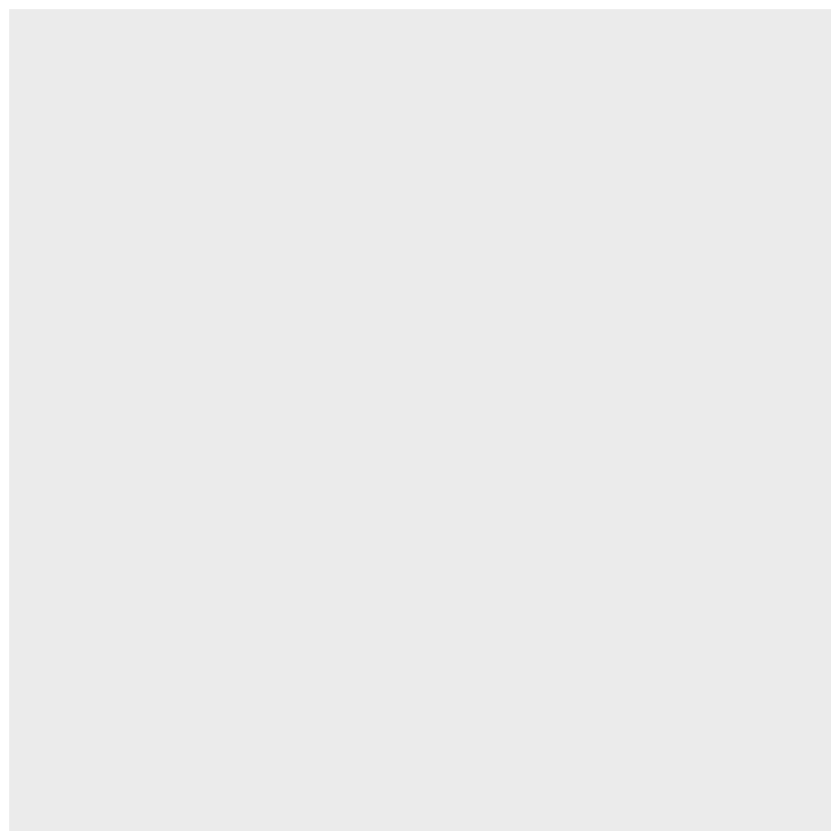

In [5]:
ggplot(d_exp)

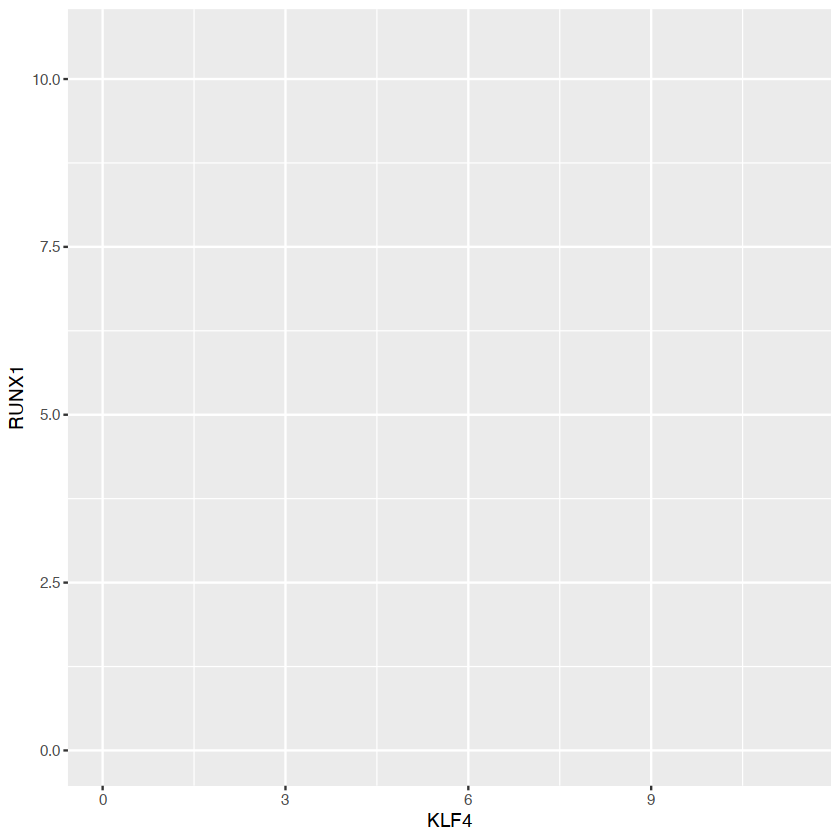

In [6]:
ggplot(d_exp, aes(x=KLF4, y=RUNX1))

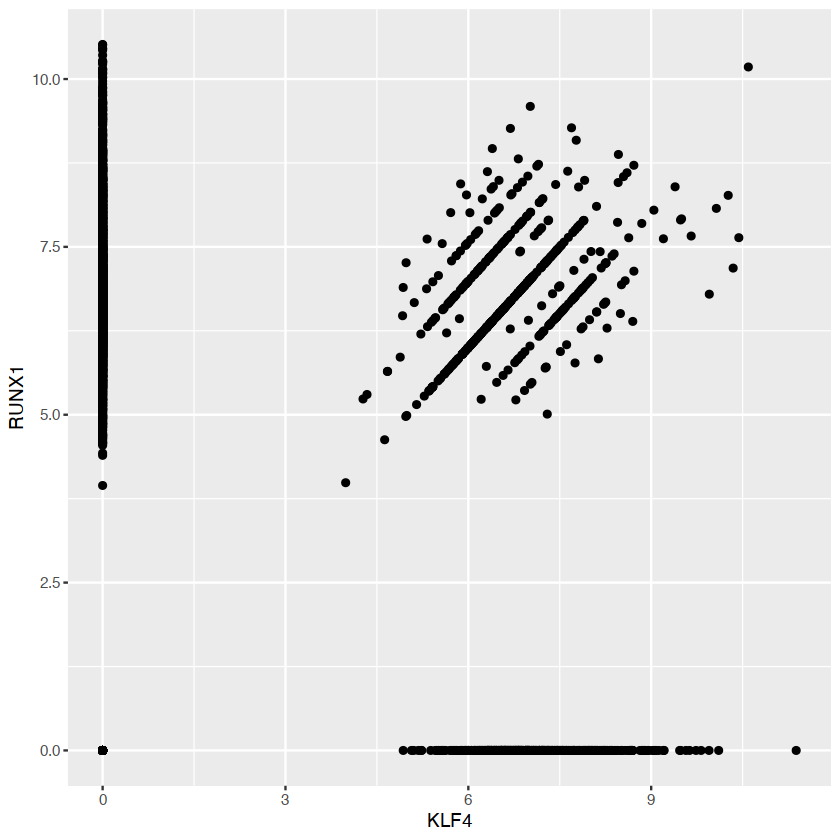

In [7]:
ggplot(d_exp, aes(x=KLF4, y=RUNX1)) + geom_point()

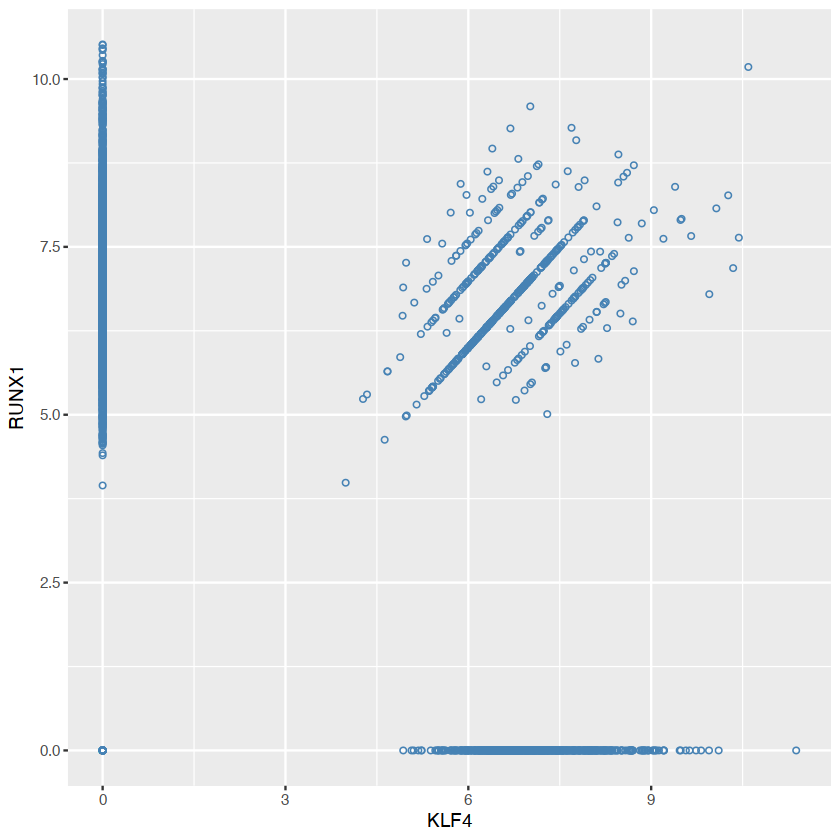

In [8]:
ggplot(d_exp, aes(x=KLF4, y=RUNX1)) + geom_point(size = 1.2, color = "steelblue", shape = 21)

It’s also possible to control points shape and color by a grouping variable (here, Sample). For example, in the code below, we map points color and shape to the datasets grouping variable.

Note that, a ggplot can be holded in a variable, say p, to be printed later



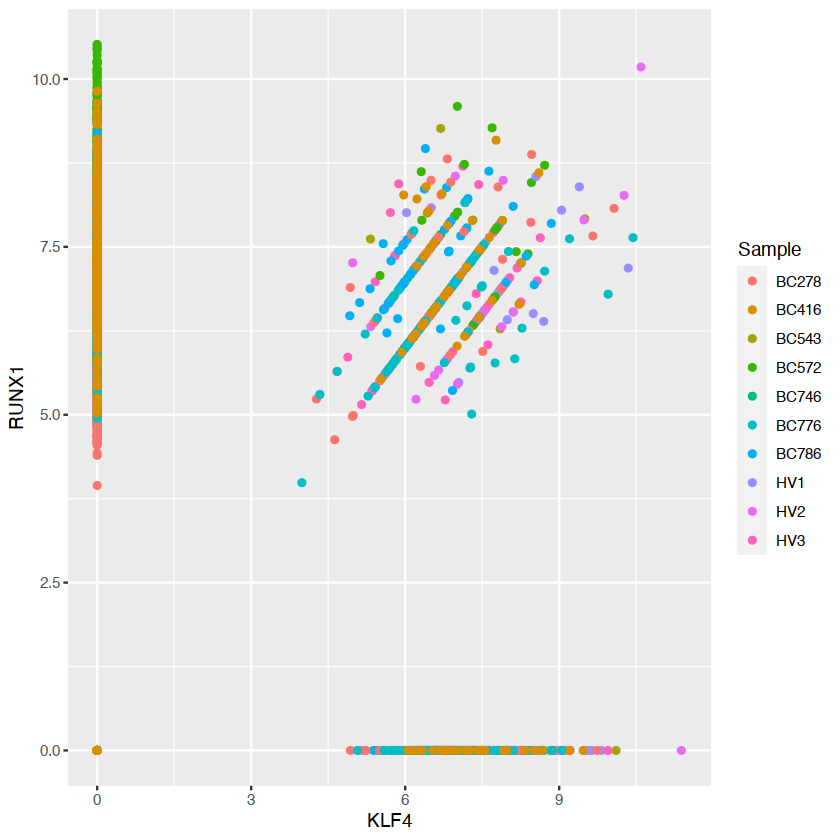

In [9]:
# Control points color by groups
ggplot(d_exp, aes(x=KLF4, y=RUNX1))+
  geom_point(aes(color = Sample))

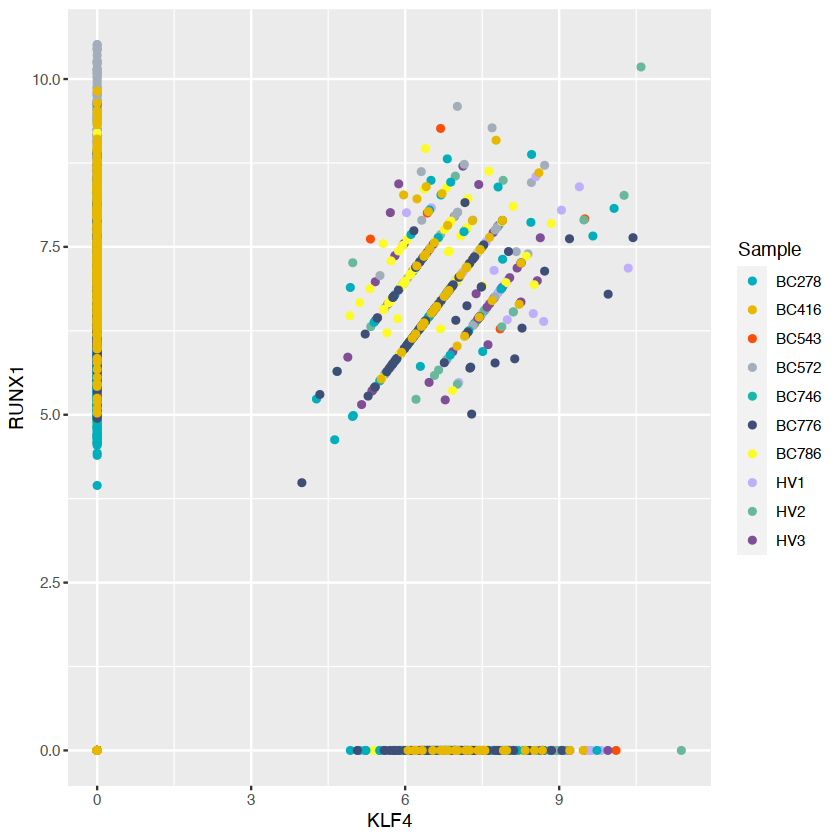

In [10]:

# Change the default color manually.
# Use the scale_color_manual() function
p <- ggplot(d_exp, aes(x=KLF4, y=RUNX1))+
  geom_point(aes(color = Sample))+
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#A2AFBB", "#17B8AB", "#3F4E77", "#FCFA27", "#BFAFFB", "#69B89B", "#7F4E97"))
print(p)

*****
[back to the top](#top)

### GGPlot theme

Note that, the default theme of ggplots is theme_gray() (or theme_grey()), which is theme with grey background and white grid lines. More themes are available for professional presentations or publications. These include: theme_bw(), theme_classic() and theme_minimal().

To change the theme of a given ggplot (p), use this: p + theme_classic().

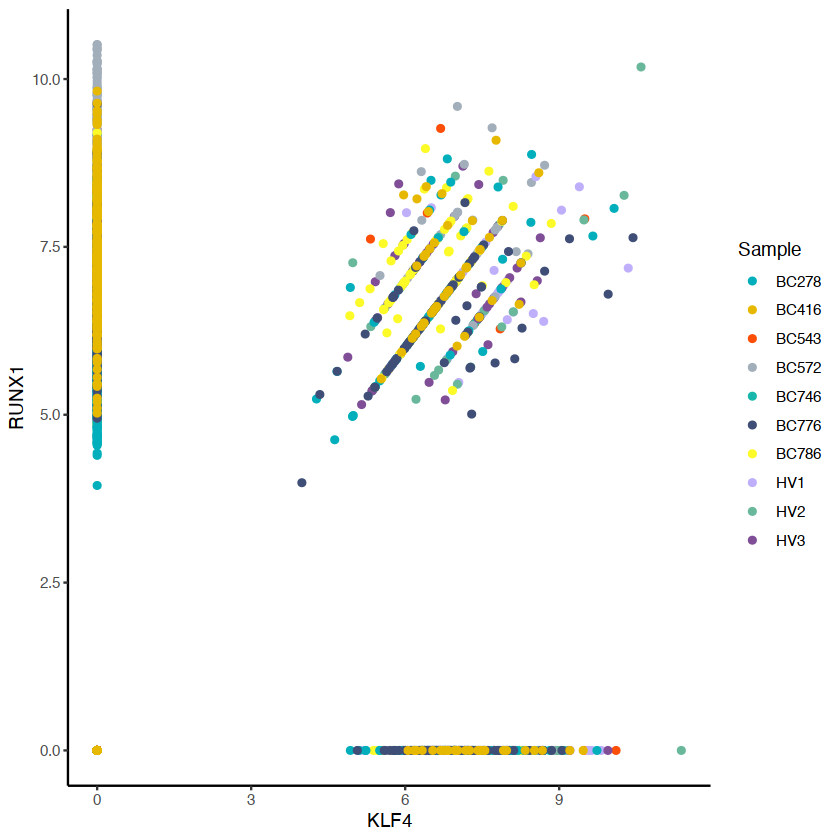

In [11]:
p <- ggplot(d_exp, aes(x=KLF4, y=RUNX1))+
  geom_point(aes(color = Sample))+
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#A2AFBB", "#17B8AB", "#3F4E77", "#FCFA27", "#BFAFFB", "#69B89B", "#7F4E97"))
p <- p + theme_classic()
print(p)

In [12]:
df <- reducedDim(sce)
head(df)

AAACCTGCACCGATAT-1,31.75737,41.45222
AAACGGGCACGACTCG-1,39.95130,44.24846
AAAGCAATCCTAAGTG-1,35.30692,40.31110
AAAGTAGGTGATGATA-1,37.10719,43.00212
AAAGTAGTCTCGCTTG-1,40.69935,44.52304
AACACGTGTTGGTAAA-1,38.65847,31.53103


Adding layers to ggplot, Lines (Prediction Line)
A plot constructed with ggplot can have more than one geom. In that case the mappings established in the ggplot() call are plot defaults that can be added to or overridden. Our plot could use a regression line:

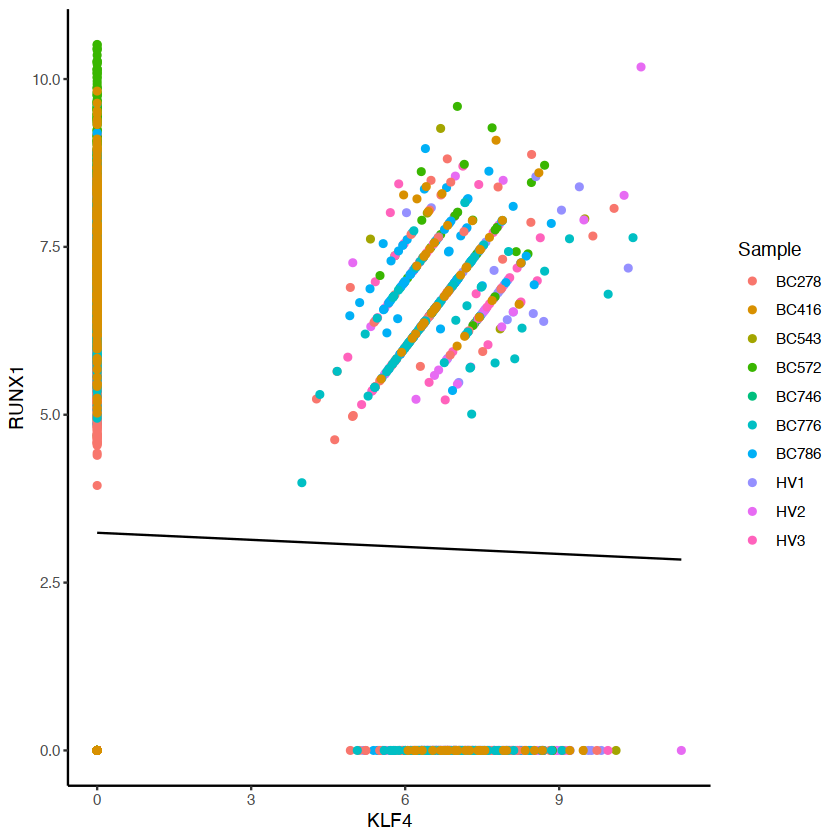

In [13]:
d_exp$pred.SC <- predict(lm(RUNX1 ~ KLF4, data = d_exp))

ggplot(d_exp, aes(x = KLF4, y = RUNX1)) + 
  geom_point(aes(color = Sample)) +
  geom_line(aes(y = pred.SC)) +
  theme_classic()

### Title, xlab & ylab

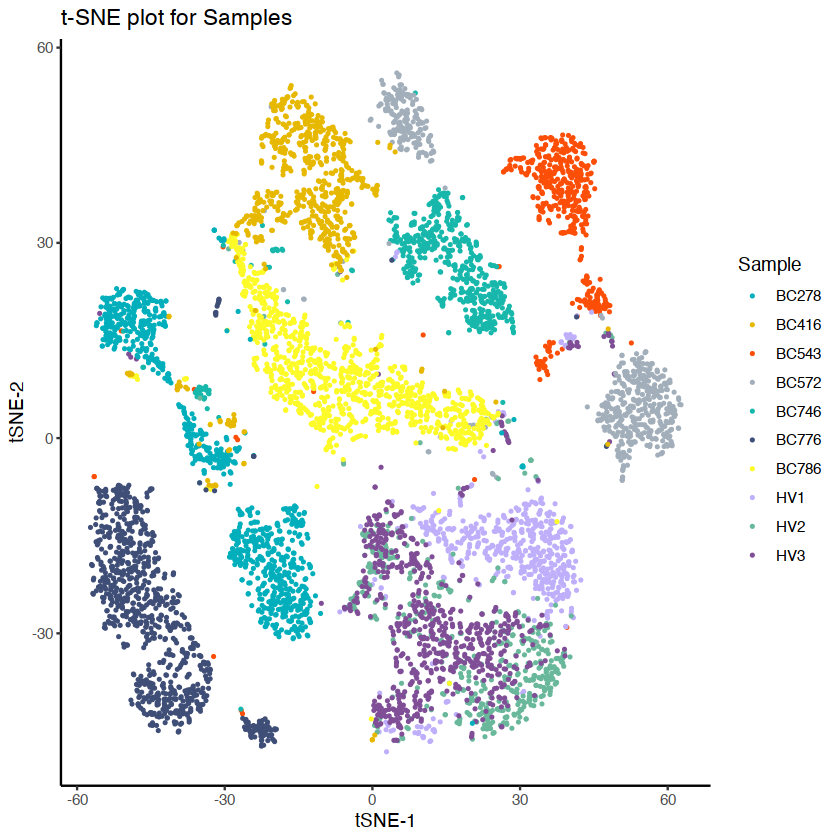

In [14]:
df <- as.data.frame(reducedDim(sce))
df$Sample <- colData(sce)$Sample
p <- ggplot(df, aes(x=V1, y=V2))+
  geom_point(size = 0.4, aes(color = Sample))+
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#A2AFBB", "#17B8AB", "#3F4E77", "#FCFA27", "#BFAFFB", "#69B89B", "#7F4E97")) + 
  ggtitle('t-SNE plot for Samples') + 
  xlab('tSNE-1') + 
  ylab('tSNE-2') + 
  theme_classic()
print(p)

### Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



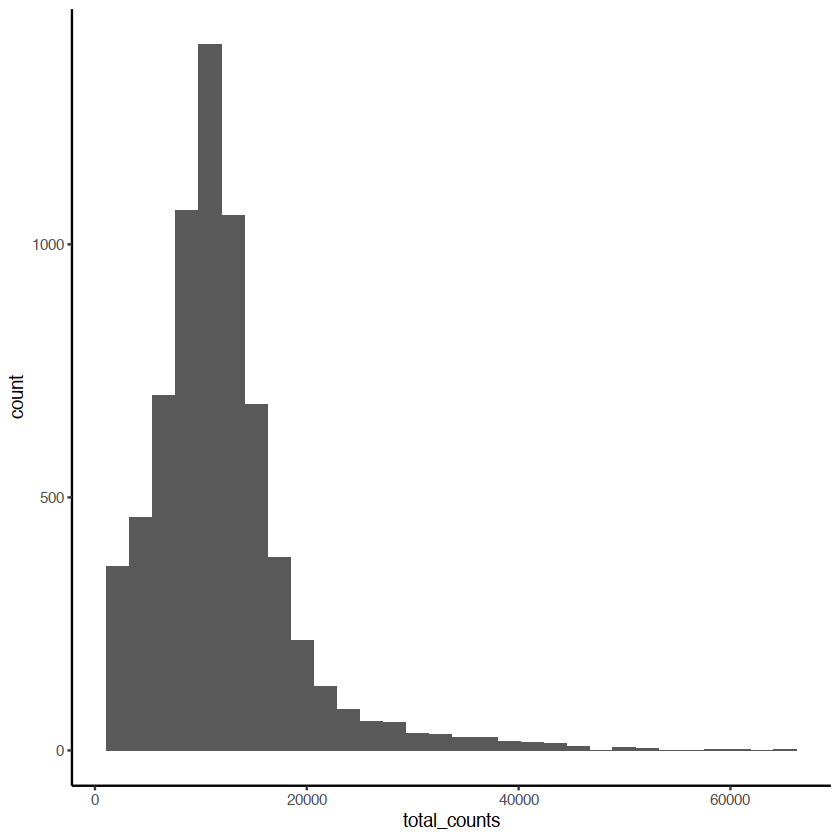

In [15]:
ggplot(d_exp, aes(x=total_counts)) + geom_histogram() + theme_classic() 

### Density plot

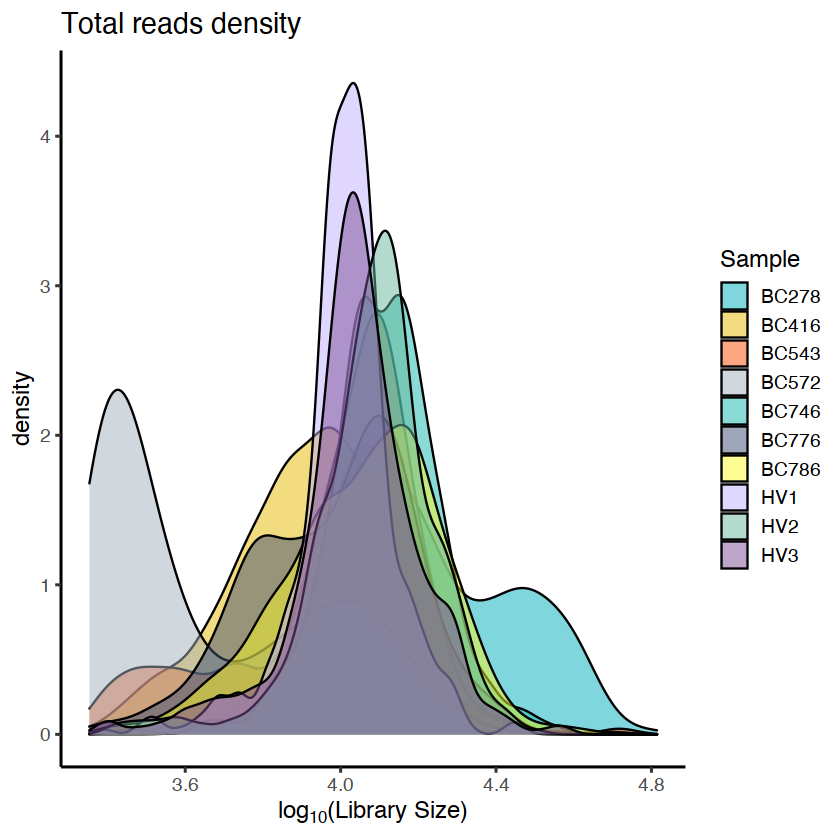

In [16]:
df <- data.frame(x=log10(sce$total_counts+1), Sample = sce$Sample)
ggplot(df,
       aes(x = x, fill = as.factor(Sample))) + 
       geom_density(alpha = 0.5) +
       labs(x = expression('log'[10]*'(Library Size)'), title = "Total reads density", fill = "Sample") + 
       theme_classic(base_size = 14) + # Setting the base size text for plots
       scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#A2AFBB", "#17B8AB", "#3F4E77", "#FCFA27", "#BFAFFB", "#69B89B", "#7F4E97")) # Need to set fill manual

### Facet

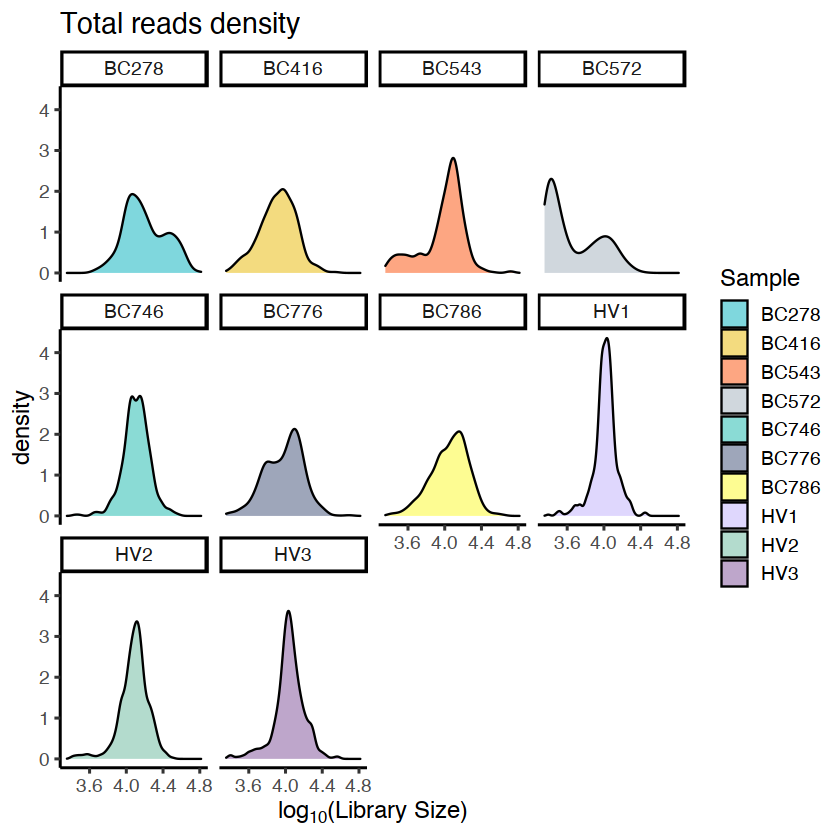

In [17]:
df <- data.frame(x=log10(sce$total_counts+1), Sample = sce$Sample)
ggplot(df,
       aes(x = x, fill = as.factor(Sample))) + 
       geom_density(alpha = 0.5) +
       labs(x = expression('log'[10]*'(Library Size)'), title = "Total reads density", fill = "Sample") + 
       theme_classic(base_size = 14) + # Setting the base size text for plots
       scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#A2AFBB", "#17B8AB", "#3F4E77", "#FCFA27", "#BFAFFB", "#69B89B", "#7F4E97")) +  # Need to set fill manual 
  facet_wrap(~Sample)

*****
[back to the top](#top)

## Statistical Transformations

Some plot types (such as scatterplots) do not require transformations–each point is plotted at x and y coordinates equal to the original value. Other plots, such as boxplots, histograms, prediction lines etc. require statistical transformations:

for a smoother the y values must be transformed into predicted values

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



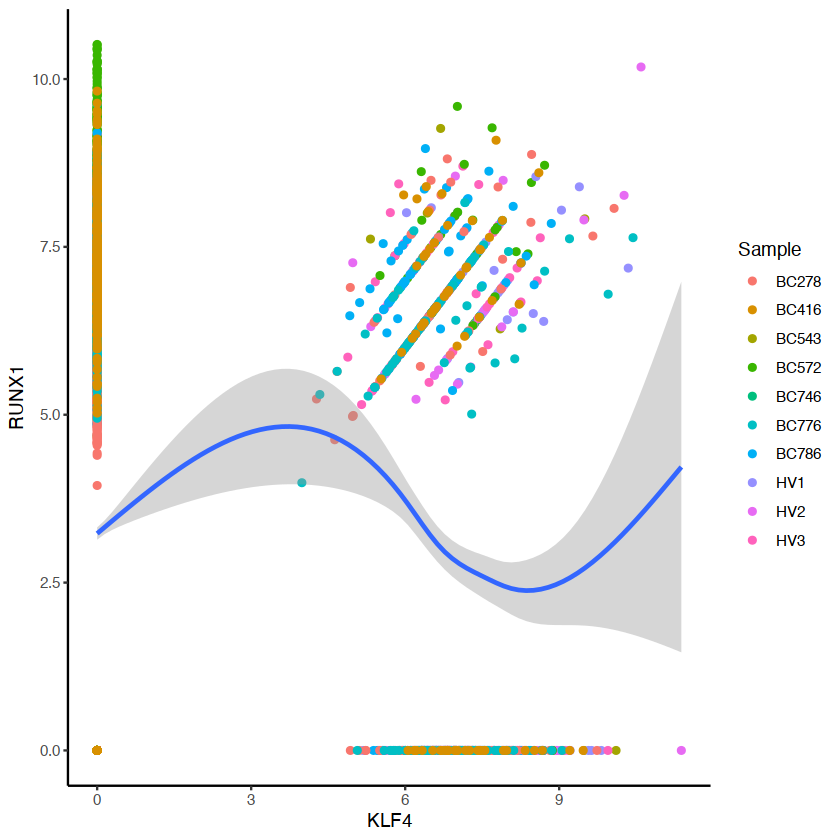

In [18]:
#d_exp$pred.SC <- predict(lm(RUNX1 ~ KLF4, data = d_exp))

ggplot(d_exp, aes(x = KLF4, y = RUNX1)) + 
  geom_point(aes(color = Sample)) +
  geom_smooth() +
  theme_classic()

`geom_smooth()` using formula 'y ~ x'



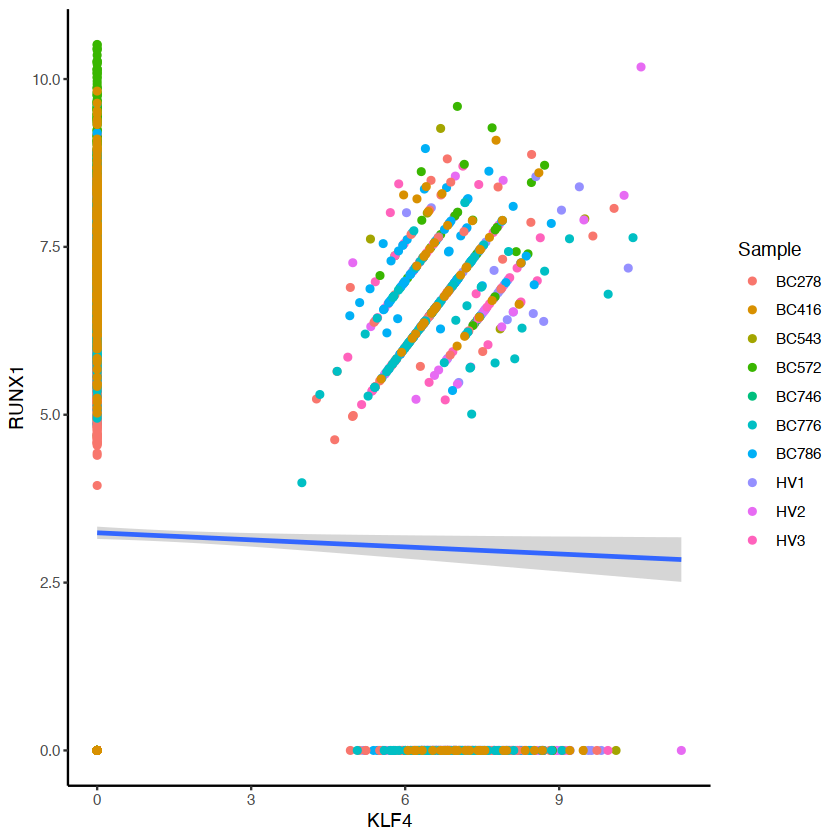

In [19]:
ggplot(d_exp, aes(x = KLF4, y = RUNX1)) + 
  geom_point(aes(color = Sample)) +
  geom_smooth(method = "lm") +
  theme_classic()

<a id="yourturn"></a>
## Your Turn


First let us look at the mpg dataset


In [20]:
mpg


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


<div class="alert alert-block alert-info">
    <b>Task 1</b></br>
<p>How would you plot the relationship between cty, the average city mileage, and hwy, the average highway mileage? How would you describe this relationship?</p>
</div>

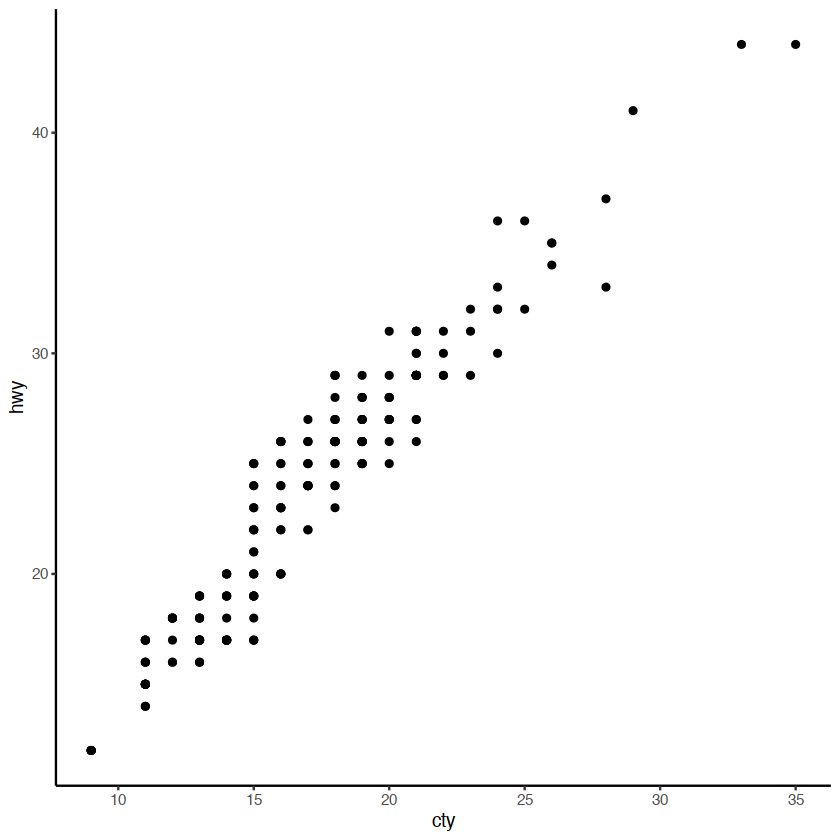

In [21]:
ggplot(mpg, aes(cty, hwy)) + 
  geom_point() +
  theme_classic()

<div class="alert alert-block alert-info">
    <b>Task 2</b> </br>
<p>How would you draw a smooth line? Also, how would you colour the transmissions differently?</p>

`geom_smooth()` using formula 'y ~ x'



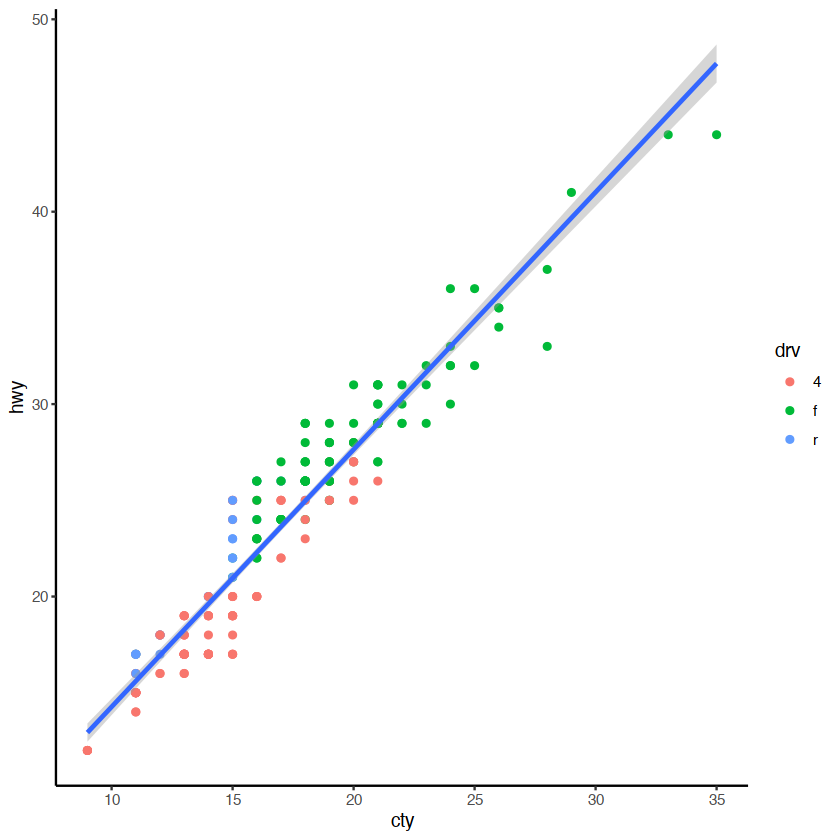

In [22]:
ggplot(mpg, aes(cty, hwy)) + 
  geom_point(aes(colour = drv)) +
  geom_smooth(method = "lm") +
  theme_classic()

<div class="alert alert-block alert-info">
    <b>Task 3</b> </br>
    <p>Show the distribution of scores for hwy, highway miles per gallon</p></div>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



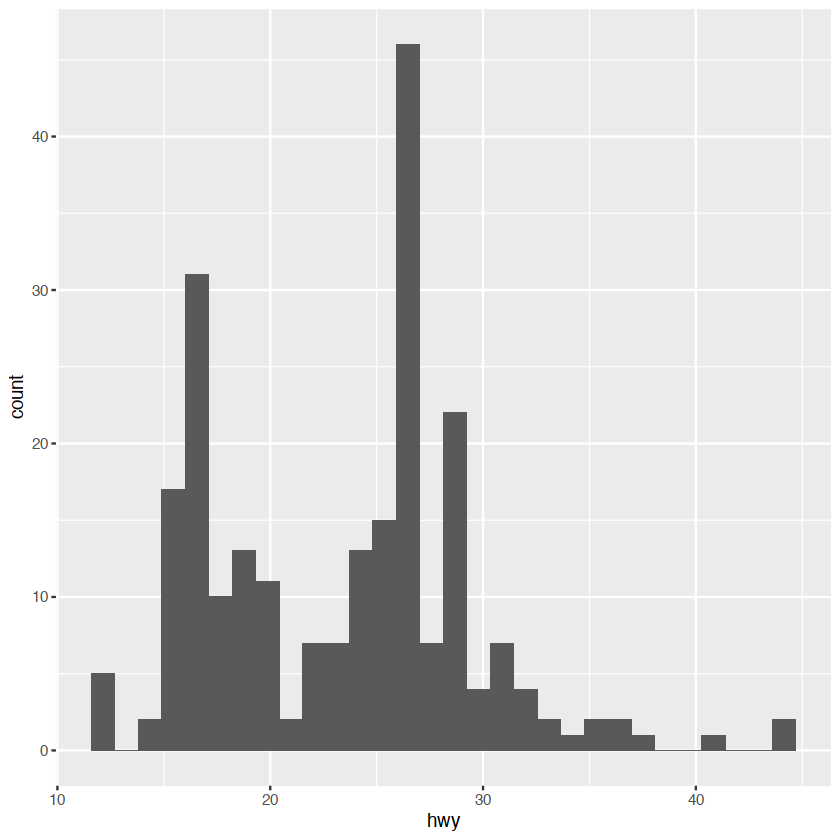

In [23]:
ggplot(mpg, aes(hwy)) + 
  geom_histogram()

<div class="alert alert-block alert-info">
    <b>Task 4</b> </br>
    <p>Produce a similar plot as shown below</p></div>

<img src="images/task4-ggplot.png" align="left" width="80%" />

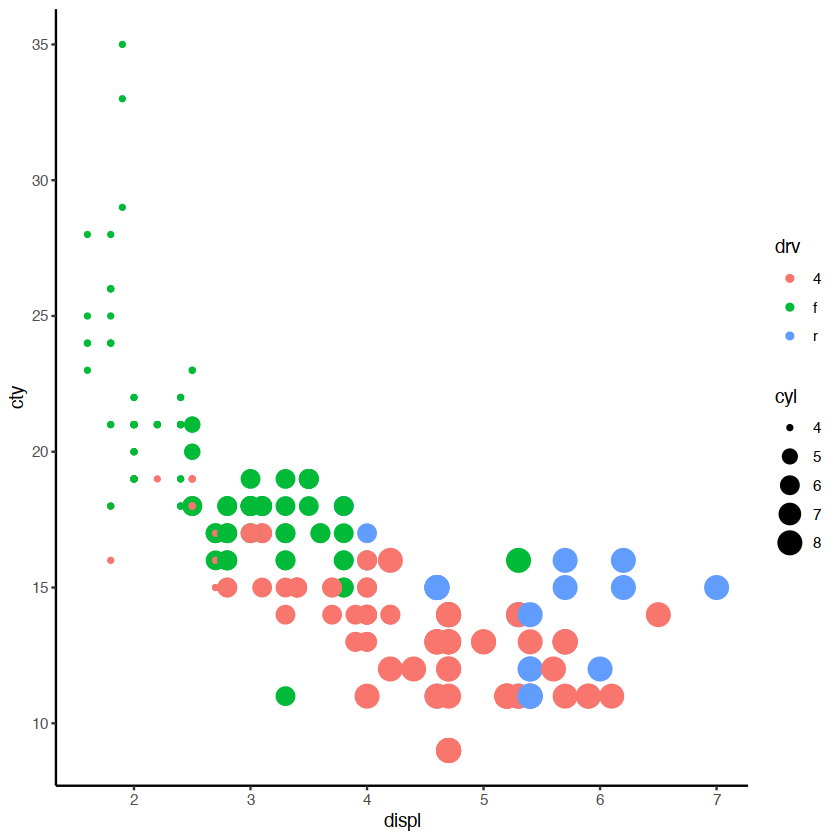

In [24]:
ggplot(mpg, aes(x=displ, y=cty, colour=drv, size=cyl)) +
  geom_point() + theme_classic()

*****
[back to the top](#top)

### Notebook details
<br>
<i>Notebook created by <strong>Syed Murtaza Baker</strong>. Other contributors include Fran Hooley... 

Publish date: May 2021<br>
Review date: May 2022</i>

Please give your feedback using the button below:

****

## Your Notes:
